# Creating a DatetimeIndex

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pytz

In [2]:
pd.__version__

'1.3.2'

### Python's `Datetime`, pandas `Timestamp`, and `panda.to_datetime()`

In [4]:
dt1 = dt.datetime(2021,1,1)
dt2 = pd.Timestamp(2021,1,1)
dt3 = pd.to_datetime('2021-1-1')

In [5]:
print(dt1)
print(dt2)
print(dt3)

2021-01-01 00:00:00
2021-01-01 00:00:00
2021-01-01 00:00:00


In [6]:
print(type(dt1))
print(type(dt2))
print(type(dt3))

<class 'datetime.datetime'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
dt1 == dt2 == dt3

True

In [8]:
dt.datetime(2021,1,1) == pd.to_datetime('2021-1-1')

True

### `pandas.to_datetime()`

In [9]:
dates = ['2021-1-1', '2021-1-2']
pd_dates = pd.to_datetime(dates)
print(pd_dates)
print(type(pd_dates))

DatetimeIndex(['2021-01-01', '2021-01-02'], dtype='datetime64[ns]', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [10]:
print(pd_dates[0])
print(type(pd_dates[0]))

2021-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
dates = ['2021-01-01', # date str format %Y-%m-%d
         '2/1/2021', # date str format %m/%d/%Y
         '03-01-2021', # date  str format %m-%d-%Y
         'April 1, 2021', # date  str format %B %d, %Y
         '20210501', # date str format %Y%m%d
          np.datetime64('2021-07-01'), # numpy datetime64
          dt.datetime(2021, 8, 1), # python datetime
          pd.Timestamp(2021,9,1) # pandas Timestamp
          ]

In [16]:
parsed_dates = pd.to_datetime(
                 dates,
                 infer_datetime_format=True,
                 errors='coerce'
                 )

print(parsed_dates)

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


In [17]:
pd.DatetimeIndex(dates) == parsed_dates

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [18]:
parsed_dates = pd.DatetimeIndex(dates)
parsed_dates

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)

In [19]:
print(f'Name of Day : {parsed_dates.day_name()}')
print(f'Month : {parsed_dates.month}')
print(f'Year : {parsed_dates.year}')
print(f'Days in Month : {parsed_dates.days_in_month}')
print(f'Quarter {parsed_dates.quarter}')
print(f'Quarter Start : {parsed_dates.is_quarter_start}')
print(f'Leap Year : {parsed_dates.is_leap_year}')
print(f'Month Start : {parsed_dates.is_month_start}')
print(f'Month End : {parsed_dates.is_month_end}')
print(f'Year Start : {parsed_dates.is_year_start}')


Name of Day : Index(['Friday', 'Monday', 'Monday', 'Thursday', 'Saturday', 'Thursday',
       'Sunday', 'Wednesday'],
      dtype='object')
Month : Int64Index([1, 2, 3, 4, 5, 7, 8, 9], dtype='int64')
Year : Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021], dtype='int64')
Days in Month : Int64Index([31, 28, 31, 30, 31, 31, 31, 30], dtype='int64')
Quarter Int64Index([1, 1, 1, 2, 2, 3, 3, 3], dtype='int64')
Quarter Start : [ True False False  True False  True False False]
Leap Year : [False False False False False False False False]
Month Start : [ True  True  True  True  True  True  True  True]
Month End : [False False False False False False False False]
Year Start : [ True False False False False False False False]


In [20]:
pd.date_range(start='2021-01-01', periods=3, freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range(start='2021-01-01',
               end='2021-01-03',
               freq='D')


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D')

# Using Format Arguemtns to DateTime

In [22]:
import pandas as pd
import datetime as dt

Using Python `datetime.strptime()`

In [23]:
dt.datetime.strptime('1/1/2022', '%m/%d/%Y').date()

datetime.date(2022, 1, 1)

In [24]:
dt.datetime.strptime('1 January, 2022', '%d %B, %Y').date()

datetime.date(2022, 1, 1)

In [25]:
dt.datetime.strptime('1-Jan-2022', '%d-%b-%Y').date()

datetime.date(2022, 1, 1)

In [26]:
dt.datetime.strptime('Saturday, January 1, 2022', '%A, %B %d, %Y').date()

datetime.date(2022, 1, 1)

In [27]:
dt_1 = dt.datetime.strptime('1/1/2022', '%m/%d/%Y')
dt_1.__str__()
str(dt_1)

'2022-01-01 00:00:00'

In [28]:
print(dt_1)

2022-01-01 00:00:00


Using `pandas.to_datetime()`

In [29]:
pd.to_datetime('1/1/2022', format='%m/%d/%Y')

Timestamp('2022-01-01 00:00:00')

In [30]:
pd.to_datetime('1 January, 2022', format='%d %B, %Y')

Timestamp('2022-01-01 00:00:00')

In [31]:
pd.to_datetime('1-Jan-2022', format='%d-%b-%Y')

Timestamp('2022-01-01 00:00:00')

In [32]:
pd.to_datetime('Saturday, January 1, 2022', format='%A, %B %d, %Y')

Timestamp('2022-01-01 00:00:00')

In [33]:
dt_2 = pd.to_datetime('1/1/2022', format='%m/%d/%Y')
print(dt_2)

2022-01-01 00:00:00


In [34]:
pd.to_datetime('1-Jan-2022')

Timestamp('2022-01-01 00:00:00')

In [35]:
pd.to_datetime('Saturday, January 1, 2022')

Timestamp('2022-01-01 00:00:00')

In [36]:
str(dt_2)
dt_2.__str__()

'2022-01-01 00:00:00'

In [37]:
dt_1 == dt_2

True

In [38]:
dt_1.date()

datetime.date(2022, 1, 1)

In [39]:
dt_2.date()

datetime.date(2022, 1, 1)

In [40]:
type(dt_1)
type(dt_2)

pandas._libs.tslibs.timestamps.Timestamp

In [41]:
isinstance(pd.DatetimeIndex, pd.Timestamp)

False

In [42]:
isinstance(dt_1, dt.datetime)

True

In [43]:
isinstance(dt_2, dt.datetime)

True

In [44]:
isinstance(dt_1, pd.Timestamp)

False

In [45]:
isinstance(dt_2, pd.Timestamp)

True

In [46]:
issubclass(pd.Timestamp, dt.datetime)

True

### Tranforming a pandas DataFrame to a time series DataFrame

In [47]:
df = pd.DataFrame(
        {'Date': ['January 1, 2022', 'January 2, 2022', 'January 3, 2022'],
         'Sales': [23000, 19020, 21000]}
            )
df

,Date,Sales
0,"January 1, 2022",23000
1,"January 2, 2022",19020
2,"January 3, 2022",21000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3 non-null      object
 1   Sales   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [49]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2022-01-01 to 2022-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


# Working with Unix EPOCH timestamps

In [72]:
import time
epoch_time = time.time()
print(epoch_time)
print(type(epoch_time))

1635220203.582277
<class 'float'>


In [184]:
import pandas as pd
t = pd.to_datetime(1635220133.855169, unit='s')
print(t)

2021-10-26 03:48:53.855169024


In [106]:
t = pd.to_datetime(1635220133.855169, unit='s', )

In [112]:
t.tz_localize('UTC').tz_convert('US/Pacific')

Timestamp('2021-10-25 20:48:53.855169024-0700', tz='US/Pacific')

In [168]:
df = pd.DataFrame(
        {'unix_epoch': [1641110340,  1641196740, 1641283140, 1641369540],
                'Sales': [23000, 19020, 21000, 17030]}
                )
df

,unix_epoch,Sales
0,1641110340,23000
1,1641196740,19020
2,1641283140,21000
3,1641369540,17030


In [181]:
df['Date'] = pd.to_datetime(df['unix_epoch'], unit='s')
df['Date'] = df['Date'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
# df.set_index('Date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2022-01-01 23:59:00-08:00 to 2022-01-04 23:59:00-08:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype                     
---  ------      --------------  -----                     
 0   unix_epoch  4 non-null      int64                     
 1   Sales       4 non-null      int64                     
 2   Date        4 non-null      datetime64[ns, US/Pacific]
dtypes: datetime64[ns, US/Pacific](1), int64(2)
memory usage: 128.0 bytes


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2022-01-01 23:59:00-08:00 to 2022-01-04 23:59:00-08:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   unix_epoch  4 non-null      int64
 1   Sales       4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes


In [178]:
df.index = df.index.date
df

,unix_epoch,Sales
2022-01-01,1641110340,23000
2022-01-02,1641196740,19020
2022-01-03,1641283140,21000
2022-01-04,1641369540,17030


In [187]:
t = pd.to_datetime(1635220133.855169, unit='s', origin='unix')

In [195]:
df = pd.DataFrame(
        {'Date': pd.date_range('01-01-2022', periods=5),
        'order' : range(5)}
                 )
df

,Date,order
0,2022-01-01,0
1,2022-01-02,1
2,2022-01-03,2
3,2022-01-04,3
4,2022-01-05,4


In [197]:
(df['Date'] -  pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")

0    1640995200
1    1641081600
2    1641168000
3    1641254400
4    1641340800
Name: Date, dtype: int64

# Working with Time Deltas

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC')
        }
)
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


In [3]:
df['expiration_dt'] = df['purchase_dt'] + pd.Timedelta(days=30)
df

,item,purchase_dt,expiration_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00


In [4]:
df['extended_dt'] = df['purchase_dt'] +\
                pd.Timedelta('35 days 12 hours 30 minutes')
df

,item,purchase_dt,expiration_dt,extended_dt
0,item1,2021-01-01 00:00:00+00:00,2021-01-31 00:00:00+00:00,2021-02-05 12:30:00+00:00
1,item2,2021-01-02 00:00:00+00:00,2021-02-01 00:00:00+00:00,2021-02-06 12:30:00+00:00
2,item3,2021-01-03 00:00:00+00:00,2021-02-02 00:00:00+00:00,2021-02-07 12:30:00+00:00
3,item4,2021-01-04 00:00:00+00:00,2021-02-03 00:00:00+00:00,2021-02-08 12:30:00+00:00
4,item5,2021-01-05 00:00:00+00:00,2021-02-04 00:00:00+00:00,2021-02-09 12:30:00+00:00
5,item6,2021-01-06 00:00:00+00:00,2021-02-05 00:00:00+00:00,2021-02-10 12:30:00+00:00


In [5]:
df.iloc[:,1:] = df.iloc[: ,1:].apply(
            lambda x: x.dt.tz_convert('US/Pacific')
                )
df

,item,purchase_dt,expiration_dt,extended_dt
0,item1,2020-12-31 16:00:00-08:00,2021-01-30 16:00:00-08:00,2021-02-05 04:30:00-08:00
1,item2,2021-01-01 16:00:00-08:00,2021-01-31 16:00:00-08:00,2021-02-06 04:30:00-08:00
2,item3,2021-01-02 16:00:00-08:00,2021-02-01 16:00:00-08:00,2021-02-07 04:30:00-08:00
3,item4,2021-01-03 16:00:00-08:00,2021-02-02 16:00:00-08:00,2021-02-08 04:30:00-08:00
4,item5,2021-01-04 16:00:00-08:00,2021-02-03 16:00:00-08:00,2021-02-09 04:30:00-08:00
5,item6,2021-01-05 16:00:00-08:00,2021-02-04 16:00:00-08:00,2021-02-10 04:30:00-08:00


In [6]:
df['exp_ext_diff'] = (
         df['extended_dt'] - df['expiration_dt']
        )
df

,item,purchase_dt,expiration_dt,extended_dt,exp_ext_diff
0,item1,2020-12-31 16:00:00-08:00,2021-01-30 16:00:00-08:00,2021-02-05 04:30:00-08:00,5 days 12:30:00
1,item2,2021-01-01 16:00:00-08:00,2021-01-31 16:00:00-08:00,2021-02-06 04:30:00-08:00,5 days 12:30:00
2,item3,2021-01-02 16:00:00-08:00,2021-02-01 16:00:00-08:00,2021-02-07 04:30:00-08:00,5 days 12:30:00
3,item4,2021-01-03 16:00:00-08:00,2021-02-02 16:00:00-08:00,2021-02-08 04:30:00-08:00,5 days 12:30:00
4,item5,2021-01-04 16:00:00-08:00,2021-02-03 16:00:00-08:00,2021-02-09 04:30:00-08:00,5 days 12:30:00
5,item6,2021-01-05 16:00:00-08:00,2021-02-04 16:00:00-08:00,2021-02-10 04:30:00-08:00,5 days 12:30:00


In [7]:
df['test'] = pd.Timedelta(days=30)
df

,item,purchase_dt,expiration_dt,extended_dt,exp_ext_diff,test
0,item1,2020-12-31 16:00:00-08:00,2021-01-30 16:00:00-08:00,2021-02-05 04:30:00-08:00,5 days 12:30:00,30 days
1,item2,2021-01-01 16:00:00-08:00,2021-01-31 16:00:00-08:00,2021-02-06 04:30:00-08:00,5 days 12:30:00,30 days
2,item3,2021-01-02 16:00:00-08:00,2021-02-01 16:00:00-08:00,2021-02-07 04:30:00-08:00,5 days 12:30:00,30 days
3,item4,2021-01-03 16:00:00-08:00,2021-02-02 16:00:00-08:00,2021-02-08 04:30:00-08:00,5 days 12:30:00,30 days
4,item5,2021-01-04 16:00:00-08:00,2021-02-03 16:00:00-08:00,2021-02-09 04:30:00-08:00,5 days 12:30:00,30 days
5,item6,2021-01-05 16:00:00-08:00,2021-02-04 16:00:00-08:00,2021-02-10 04:30:00-08:00,5 days 12:30:00,30 days


In [8]:
tds = pd.to_timedelta(['1 day', '5 days', '10 days 6 hours'])
tds

TimedeltaIndex(['1 days 00:00:00', '5 days 00:00:00', '10 days 06:00:00'], dtype='timedelta64[ns]', freq=None)

In [9]:
pd.to_timedelta(range(5), unit='W')

TimedeltaIndex(['0 days', '7 days', '14 days', '21 days', '28 days'], dtype='timedelta64[ns]', freq=None)

In [13]:
df['purchase_dt']

0   2020-12-31 16:00:00-08:00
1   2021-01-01 16:00:00-08:00
2   2021-01-02 16:00:00-08:00
3   2021-01-03 16:00:00-08:00
4   2021-01-04 16:00:00-08:00
5   2021-01-05 16:00:00-08:00
Name: purchase_dt, dtype: datetime64[ns, US/Pacific]

### Python datetime.timedelta vs pd.Timedelta

In [23]:
import datetime as dt

In [19]:
dt.timedelta(days=1)

datetime.timedelta(days=1)

In [21]:
pd.Timedelta(days=1) == dt.timedelta(days=1)

True

In [57]:
dt_1 = pd.Timedelta(days=1)
dt_2 = dt.timedelta(days=1)
isinstance(pd.Timedelta, dt.timedelta)

False

In [25]:
isinstance(dt_1, dt.timedelta)

True

In [28]:
isinstance(dt_1, pd.Timedelta)

True

In [30]:
pd.Timedelta(days = 1, hours = 12)

Timedelta('1 days 12:00:00')

In [38]:
pd.Timedelta('10 U')

Timedelta('0 days 00:00:00.000010')

In [54]:
pd.Timedelta(days=1, hours=12, minutes=55)

Timedelta('1 days 12:55:00')

In [44]:
pd.Timedelta('1 day 12 hours 55 minutes')

Timedelta('1 days 12:55:00')

In [51]:
pd.Timedelta('1D 12H 55T')

Timedelta('1 days 12:55:00')

In [62]:
dt_1.min

Timedelta('-106752 days +00:12:43.145224193')

In [69]:
2*dt_1

Timedelta('2 days 00:00:00')

In [75]:
week_td = pd.Timedelta('1W')
pd.to_datetime('1 JAN 2022') + week_td

Timestamp('2022-01-08 00:00:00')

In [76]:
pd.to_datetime('1 JAN 2022') + 2*week_td

Timestamp('2022-01-15 00:00:00')

### There is more

In [95]:
import pandas as pd

df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5', 'item6'],
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D', tz='UTC')
        }
)
df

,item,purchase_dt
0,item1,2021-01-01 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00


In [96]:
df['1 week'] = pd.Timedelta('1W')

In [97]:
df

,item,purchase_dt,1 week
0,item1,2021-01-01 00:00:00+00:00,7 days
1,item2,2021-01-02 00:00:00+00:00,7 days
2,item3,2021-01-03 00:00:00+00:00,7 days
3,item4,2021-01-04 00:00:00+00:00,7 days
4,item5,2021-01-05 00:00:00+00:00,7 days
5,item6,2021-01-06 00:00:00+00:00,7 days


In [98]:
df['1_week_more'] = df['purchase_dt'] + df['1 week']
df['1_week_less'] = df['purchase_dt'] - df['1 week']
df

,item,purchase_dt,1 week,1_week_more,1_week_less
0,item1,2021-01-01 00:00:00+00:00,7 days,2021-01-08 00:00:00+00:00,2020-12-25 00:00:00+00:00
1,item2,2021-01-02 00:00:00+00:00,7 days,2021-01-09 00:00:00+00:00,2020-12-26 00:00:00+00:00
2,item3,2021-01-03 00:00:00+00:00,7 days,2021-01-10 00:00:00+00:00,2020-12-27 00:00:00+00:00
3,item4,2021-01-04 00:00:00+00:00,7 days,2021-01-11 00:00:00+00:00,2020-12-28 00:00:00+00:00
4,item5,2021-01-05 00:00:00+00:00,7 days,2021-01-12 00:00:00+00:00,2020-12-29 00:00:00+00:00
5,item6,2021-01-06 00:00:00+00:00,7 days,2021-01-13 00:00:00+00:00,2020-12-30 00:00:00+00:00


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   item         6 non-null      object             
 1   purchase_dt  6 non-null      datetime64[ns, UTC]
 2   1 week       6 non-null      timedelta64[ns]    
 3   1_week_more  6 non-null      datetime64[ns, UTC]
 4   1_week_less  6 non-null      datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3), object(1), timedelta64[ns](1)
memory usage: 368.0+ bytes


In [107]:
pd.timedelta_range('1W 2 days', periods=5)

TimedeltaIndex(['9 days', '10 days', '11 days', '12 days', '13 days'], dtype='timedelta64[ns]', freq='D')

In [112]:
df = pd.DataFrame(
        {       
        'item': ['item1', 'item2', 'item3', 'item4', 'item5'],
        'purchase_dt': pd.date_range('2021-01-01', periods=5, freq='D', tz='UTC'),
        'time_deltas': pd.timedelta_range('1W 2 days 6 hours', periods=5)
        }

)

,item,purchase_dt,time_deltas
0,item1,2021-01-01 00:00:00+00:00,9 days 06:00:00
1,item2,2021-01-02 00:00:00+00:00,10 days 06:00:00
2,item3,2021-01-03 00:00:00+00:00,11 days 06:00:00
3,item4,2021-01-04 00:00:00+00:00,12 days 06:00:00
4,item5,2021-01-05 00:00:00+00:00,13 days 06:00:00


# Converting Datetime with TimeZone information 

In [267]:
import pandas as pd

In [317]:
df = pd.DataFrame(
        {       
        'Location': ['Los Angeles', 
                     'New York',
                     'Berlin', 
                     'New Delhi', 
                     'Moscow', 
                     'Tokyo', 
                     'Dubai'],
        'tz': ['US/Pacific', 
               'US/Eastern', 
               'Europe/Berlin', 
               'Asia/Kolkata', 
               'Europe/Moscow', 
               'Asia/Tokyo',
               'Asia/Dubai'],
        'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
        }).set_index('visit_dt')

In [318]:
df

,Location,tz
visit_dt,,
2021-10-28 22:00:00,Los Angeles,US/Pacific
2021-10-28 22:45:00,New York,US/Eastern
2021-10-28 23:30:00,Berlin,Europe/Berlin
2021-10-29 00:15:00,New Delhi,Asia/Kolkata
2021-10-29 01:00:00,Moscow,Europe/Moscow
2021-10-29 01:45:00,Tokyo,Asia/Tokyo
2021-10-29 02:30:00,Dubai,Asia/Dubai


In [319]:
df = df.tz_localize('UTC')
df

,Location,tz
visit_dt,,
2021-10-28 22:00:00+00:00,Los Angeles,US/Pacific
2021-10-28 22:45:00+00:00,New York,US/Eastern
2021-10-28 23:30:00+00:00,Berlin,Europe/Berlin
2021-10-29 00:15:00+00:00,New Delhi,Asia/Kolkata
2021-10-29 01:00:00+00:00,Moscow,Europe/Moscow
2021-10-29 01:45:00+00:00,Tokyo,Asia/Tokyo
2021-10-29 02:30:00+00:00,Dubai,Asia/Dubai


In [320]:
df_hq = df.tz_convert('Asia/Tokyo')
df_hq

,Location,tz
visit_dt,,
2021-10-29 07:00:00+09:00,Los Angeles,US/Pacific
2021-10-29 07:45:00+09:00,New York,US/Eastern
2021-10-29 08:30:00+09:00,Berlin,Europe/Berlin
2021-10-29 09:15:00+09:00,New Delhi,Asia/Kolkata
2021-10-29 10:00:00+09:00,Moscow,Europe/Moscow
2021-10-29 10:45:00+09:00,Tokyo,Asia/Tokyo
2021-10-29 11:30:00+09:00,Dubai,Asia/Dubai


In [328]:
df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)

visit_dt
2021-10-28 22:00:00+00:00    2021-10-28 15:00:00-07:00
2021-10-28 22:45:00+00:00    2021-10-28 18:45:00-04:00
2021-10-28 23:30:00+00:00    2021-10-29 01:30:00+02:00
2021-10-29 00:15:00+00:00    2021-10-29 05:45:00+05:30
2021-10-29 01:00:00+00:00    2021-10-29 04:00:00+03:00
2021-10-29 01:45:00+00:00    2021-10-29 10:45:00+09:00
2021-10-29 02:30:00+00:00    2021-10-29 06:30:00+04:00
dtype: object

In [325]:
df['local_dt'] = df.index
df['local_dt'] = df.apply(lambda x: pd.Timestamp.tz_convert(x['local_dt'], x['tz']), axis=1)
df

,Location,tz,local_dt
visit_dt,,,
2021-10-28 22:00:00+00:00,Los Angeles,US/Pacific,2021-10-28 15:00:00-07:00
2021-10-28 22:45:00+00:00,New York,US/Eastern,2021-10-28 18:45:00-04:00
2021-10-28 23:30:00+00:00,Berlin,Europe/Berlin,2021-10-29 01:30:00+02:00
2021-10-29 00:15:00+00:00,New Delhi,Asia/Kolkata,2021-10-29 05:45:00+05:30
2021-10-29 01:00:00+00:00,Moscow,Europe/Moscow,2021-10-29 04:00:00+03:00
2021-10-29 01:45:00+00:00,Tokyo,Asia/Tokyo,2021-10-29 10:45:00+09:00
2021-10-29 02:30:00+00:00,Dubai,Asia/Dubai,2021-10-29 06:30:00+04:00


In [ ]:
pd.to_datetime(df['local_dt'], utc=True)

visit_dt
2021-10-28 22:00:00+00:00   2021-10-28 22:00:00+00:00
2021-10-28 22:45:00+00:00   2021-10-28 22:45:00+00:00
2021-10-28 23:30:00+00:00   2021-10-28 23:30:00+00:00
2021-10-29 00:15:00+00:00   2021-10-29 00:15:00+00:00
2021-10-29 01:00:00+00:00   2021-10-29 01:00:00+00:00
2021-10-29 01:45:00+00:00   2021-10-29 01:45:00+00:00
2021-10-29 02:30:00+00:00   2021-10-29 02:30:00+00:00
Name: local_dt, dtype: datetime64[ns, UTC]

### There is More

In [346]:
df = pd.DataFrame(
        {       
        'Location': ['Los Angeles', 
                     'New York',
                     'Berlin', 
                     'New Delhi', 
                     'Moscow', 
                     'Tokyo', 
                     'Dubai'],
        'tz': ['US/Pacific', 
               'US/Eastern', 
               'Europe/Berlin', 
               'Asia/Kolkata', 
               'Europe/Moscow', 
               'Asia/Tokyo',
               'Asia/Dubai'],
        'visit_dt': pd.date_range(start='22:00',periods=7, freq='45min'),
        }).set_index('visit_dt').tz_localize('UTC').tz_convert('Asia/Tokyo')
df

,Location,tz
visit_dt,,
2021-10-29 07:00:00+09:00,Los Angeles,US/Pacific
2021-10-29 07:45:00+09:00,New York,US/Eastern
2021-10-29 08:30:00+09:00,Berlin,Europe/Berlin
2021-10-29 09:15:00+09:00,New Delhi,Asia/Kolkata
2021-10-29 10:00:00+09:00,Moscow,Europe/Moscow
2021-10-29 10:45:00+09:00,Tokyo,Asia/Tokyo
2021-10-29 11:30:00+09:00,Dubai,Asia/Dubai


In [345]:
df.index = df.index.strftime('%Y-%m-%d %H:%M %p')
df

,Location,tz
visit_dt,,
2021-10-29 07:00 AM,Los Angeles,US/Pacific
2021-10-29 07:45 AM,New York,US/Eastern
2021-10-29 08:30 AM,Berlin,Europe/Berlin
2021-10-29 09:15 AM,New Delhi,Asia/Kolkata
2021-10-29 10:00 AM,Moscow,Europe/Moscow
2021-10-29 10:45 AM,Tokyo,Asia/Tokyo
2021-10-29 11:30 AM,Dubai,Asia/Dubai


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2021-10-29 07:00:00+09:00 to 2021-10-29 11:30:00+09:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  7 non-null      object
 1   tz        7 non-null      object
dtypes: object(2)
memory usage: 168.0+ bytes


# Working with Date Offets

In [466]:
import pandas as pd
import numpy as np

In [527]:
np.random.seed(10)
df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,13
2021-01-02,17
2021-01-03,8
2021-01-04,19
2021-01-05,4
2021-01-06,5


In [511]:
df['day'] = df.index.day_name()

In [512]:
df

,production,day
purchase_dt,,
2021-01-01,13,Friday
2021-01-02,17,Saturday
2021-01-03,8,Sunday
2021-01-04,19,Monday
2021-01-05,4,Tuesday
2021-01-06,5,Wednesday


In [513]:
df.reset_index().groupby(['purchase_dt', 'day']).sum()

,,production
purchase_dt,day,
2021-01-01,Friday,13
2021-01-02,Saturday,17
2021-01-03,Sunday,8
2021-01-04,Monday,19
2021-01-05,Tuesday,4
2021-01-06,Wednesday,5


In [523]:
df['BusinessDay'] = df.index + pd.offsets.BDay(0)
df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,day,BusinessDay,BDay Name
purchase_dt,,,,
2021-01-01,13,Friday,2021-01-01,Friday
2021-01-02,17,Saturday,2021-01-04,Monday
2021-01-03,8,Sunday,2021-01-04,Monday
2021-01-04,19,Monday,2021-01-04,Monday
2021-01-05,4,Tuesday,2021-01-05,Tuesday
2021-01-06,5,Wednesday,2021-01-06,Wednesday


In [521]:
df.groupby(['BusinessDay', 'BDay Name']).sum()

,,production
BusinessDay,BDay Name,
2021-01-01,Friday,13
2021-01-04,Monday,44
2021-01-05,Tuesday,4
2021-01-06,Wednesday,5


<AxesSubplot:xlabel='BusinessDay,BDay Name'>

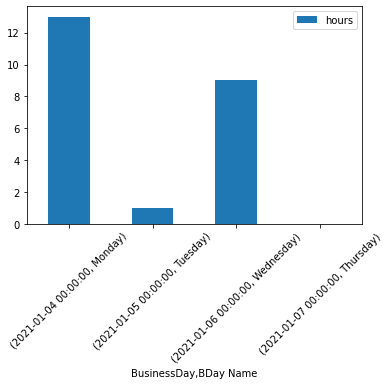

In [495]:
df.groupby(['BusinessDay', 'BDay Name']).sum().plot.bar(rot=45)

In [532]:
np.random.seed(10)
df = pd.DataFrame(
        {       
        'purchase_dt': pd.date_range('2021-01-01', periods=6, freq='D'),
        'production' : np.random.randint(4, 20, 6)
        }).set_index('purchase_dt')
df

,production
purchase_dt,
2021-01-01,13
2021-01-02,17
2021-01-03,8
2021-01-04,19
2021-01-05,4
2021-01-06,5


In [537]:
df['QuarterEnd'] = df.index + pd.offsets.QuarterEnd(0)
#df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,QuarterEnd,MonthEnd,BusinessDay
purchase_dt,,,,
2021-01-01,13,2021-03-31,2021-01-31,2021-01-01
2021-01-02,17,2021-03-31,2021-01-31,2021-01-04
2021-01-03,8,2021-03-31,2021-01-31,2021-01-04
2021-01-04,19,2021-03-31,2021-01-31,2021-01-04
2021-01-05,4,2021-03-31,2021-01-31,2021-01-05
2021-01-06,5,2021-03-31,2021-01-31,2021-01-06


In [538]:
df['MonthEnd'] = df.index + pd.offsets.MonthEnd(0)
#df['BDay Name'] = df['BusinessDay'].dt.day_name()
df

,production,QuarterEnd,MonthEnd,BusinessDay
purchase_dt,,,,
2021-01-01,13,2021-03-31,2021-01-31,2021-01-01
2021-01-02,17,2021-03-31,2021-01-31,2021-01-04
2021-01-03,8,2021-03-31,2021-01-31,2021-01-04
2021-01-04,19,2021-03-31,2021-01-31,2021-01-04
2021-01-05,4,2021-03-31,2021-01-31,2021-01-05
2021-01-06,5,2021-03-31,2021-01-31,2021-01-06


In [539]:
df['BusinessDay'] = df.index + pd.offsets.BDay(0)

In [536]:
df

,production,QuarterEnd,MonthEnd,BusinessDay
purchase_dt,,,,
2021-01-01,13,2021-03-31,2021-01-31,2021-01-01
2021-01-02,17,2021-03-31,2021-01-31,2021-01-04
2021-01-03,8,2021-03-31,2021-01-31,2021-01-04
2021-01-04,19,2021-03-31,2021-01-31,2021-01-04
2021-01-05,4,2021-03-31,2021-01-31,2021-01-05
2021-01-06,5,2021-03-31,2021-01-31,2021-01-06


In [562]:
from pandas.tseries.holiday import (
    Holiday,
    nearest_workday,
)

In [563]:
holiday = Holiday("New Years", month=1, day=1, observance=nearest_workday)

In [568]:
df.index + pd.offsets.CDay(calendar=holiday)

/Users/tarekatwan/opt/anaconda3/envs/ch2/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(


DatetimeIndex(['2021-01-04', '2021-01-04', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07'],
              dtype='datetime64[ns]', name='purchase_dt', freq=None)

In [570]:
from pandas.tseries.offsets.BusinessDay import holidays

ModuleNotFoundError: No module named 'pandas.tseries.offsets.BusinessDay'; 'pandas.tseries.offsets' is not a package